In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

In [2]:
##====
CORR_2_2 = np.load("/glade/work/zhixing/python_scripts/data_preprocessing/SOM-test/evaluation_metrics/2*2_CORR.npy")
CORR_2_3 = np.load("/glade/work/zhixing/python_scripts/data_preprocessing/SOM-test/evaluation_metrics/2*3_CORR.npy")
CORR_2_4 = np.load("/glade/work/zhixing/python_scripts/data_preprocessing/SOM-test/evaluation_metrics/2*4_CORR.npy")
CORR_3_3 = np.load("/glade/work/zhixing/python_scripts/data_preprocessing/SOM-test/evaluation_metrics/3*3_CORR.npy")
CORR_3_4 = np.load("/glade/work/zhixing/python_scripts/data_preprocessing/SOM-test/evaluation_metrics/3*4_CORR.npy")
CORR_4_4 = np.load("/glade/work/zhixing/python_scripts/data_preprocessing/SOM-test/evaluation_metrics/4*4_CORR.npy")
CORR_5_5 = np.load("/glade/work/zhixing/python_scripts/data_preprocessing/SOM-test/evaluation_metrics/5*5_CORR.npy")

CORR_list = [CORR_2_2, CORR_2_3, CORR_2_4, CORR_3_3, CORR_3_4, CORR_4_4, CORR_5_5]

##--- statistical data ---###
stats_list_CORR = []; label_list = ['2*2','2*3','2*4','3*3','3*4','4*4','5*5']
for CORR, label in zip(CORR_list, label_list):
    stats_corr   = cbook.boxplot_stats(CORR,  bootstrap=1000)
    q95_CORR     = np.quantile(CORR,0.95) # 95% quantitle
    q05_CORR     = np.quantile(CORR,0.05) # 5%  quantitle
    a = CORR[np.where((CORR<q05_CORR))]
    b = CORR[np.where((CORR>q95_CORR) )]
    outliers = np.hstack((a,b))

    stats_corr[0]['whishi'] =  q95_CORR
    stats_corr[0]['whislo'] =  q05_CORR
    stats_corr[0]['fliers'] =  outliers
    stats_list_CORR.append(stats_corr[0])

##===========
SI_2_2 = np.load("/glade/work/zhixing/python_scripts/data_preprocessing/SOM-test/evaluation_metrics/2*2_SI.npy")
SI_2_3 = np.load("/glade/work/zhixing/python_scripts/data_preprocessing/SOM-test/evaluation_metrics/2*3_SI.npy")
SI_2_4 = np.load("/glade/work/zhixing/python_scripts/data_preprocessing/SOM-test/evaluation_metrics/2*4_SI.npy")
SI_3_3 = np.load("/glade/work/zhixing/python_scripts/data_preprocessing/SOM-test/evaluation_metrics/3*3_SI.npy")
SI_3_4 = np.load("/glade/work/zhixing/python_scripts/data_preprocessing/SOM-test/evaluation_metrics/3*4_SI.npy")
SI_4_4 = np.load("/glade/work/zhixing/python_scripts/data_preprocessing/SOM-test/evaluation_metrics/4*4_SI.npy")
SI_5_5 = np.load("/glade/work/zhixing/python_scripts/data_preprocessing/SOM-test/evaluation_metrics/5*5_SI.npy")

SI_list = [SI_2_2, SI_2_3, SI_2_4, SI_3_3, SI_3_4, SI_4_4, SI_5_5]

##--- statistical data ---###
stats_list_SI = []; label_list = ['2*2','2*3','2*4','3*3','3*4','4*4','5*5']
for SI, label in zip(SI_list, label_list):
    stats_corr   = cbook.boxplot_stats(SI,  bootstrap=1000)
    q95_SI     = np.quantile(SI,0.95) # 95% quantitle
    q05_SI     = np.quantile(SI,0.05) # 5%  quantitle
    a = SI[np.where((SI<q05_SI))]  ## the outlier is under 5 percentage
    b = SI[np.where((SI>q95_SI) )] ## the outlier is above 95 percentage
    outliers = np.hstack((a,b))

    stats_corr[0]['whishi'] =  q95_SI
    stats_corr[0]['whislo'] =  q05_SI
    stats_corr[0]['fliers'] =  outliers
    stats_list_SI.append(stats_corr[0])    
    
# box_plot  = ax.bxp(stats_list_TP, positions=np.arange(1,8), showfliers=True, shownotches=False, showmeans = True)
# ax.tick_params(axis='both',length=6,width=3,labelsize='xx-large')
# ax.set_xlabel("SOM Structure", fontsize = 'xx-large')
# ax.set_ylabel("Topographic Product", fontsize = 'xx-large')

Text(0.14, 0.84, '700hPa Geopotential Height')

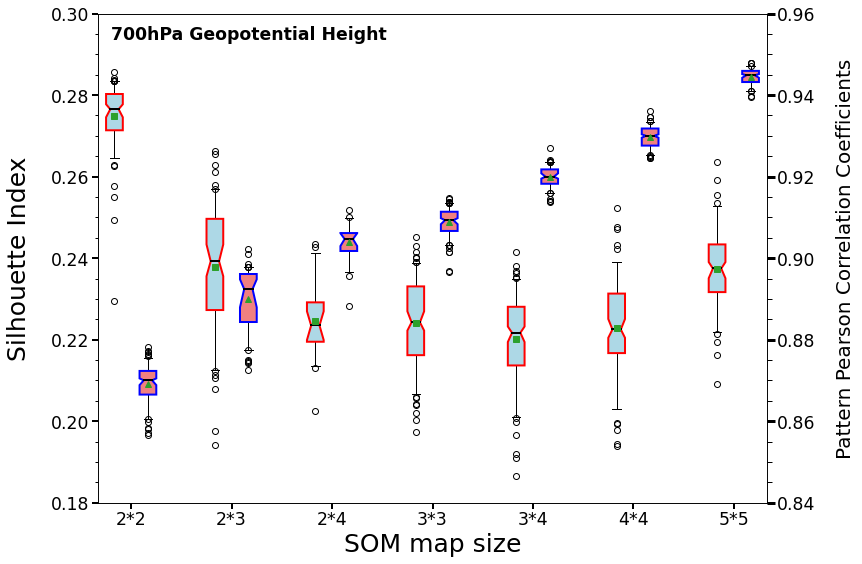

In [14]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize = (12,9))

boxplot_SI = ax.bxp(stats_list_SI, positions=np.arange(0,20,3), showfliers=True, shownotches=True, showmeans=True, patch_artist=True,\
                boxprops = {'ec':'red','fc':'lightblue','lw':2}, medianprops={'color':'k','lw':2}, meanprops={'marker':'s'})
twin_ax = ax.twinx()
box_plot_SI  = twin_ax.bxp(stats_list_CORR, positions=np.arange(1,21,3), showfliers=True,shownotches=True,showmeans=True,patch_artist=True,\
                       boxprops = {'ec':'blue','fc':'lightcoral','lw':2}, medianprops={'color':'k','lw':2})
xticks = ax.set_xticks(np.arange(0.5,21.5,3))
xticks_labels = ax.set_xticklabels(['2*2','2*3','2*4','3*3','3*4','4*4','5*5'])

ax.set_ylabel("Silhouette Index", fontsize = 25, labelpad=20)
ax.tick_params(which='major',labelsize='xx-large', width=2, length=6,  pad=2)
ax.tick_params(which='minor',labelsize='x-large', width=1, length=3,  pad=1)
ax.set_ylim(0.18,0.3)
ax.yaxis.set_major_locator(ticker.AutoLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

twin_ax.set_ylabel("Pattern Pearson Correlation Coefficients", fontsize = 20, labelpad=20)
twin_ax.set_ylim(0.84,0.96)
twin_ax.tick_params(which='major',labelsize='xx-large', width=3, length=8,  pad=2)
twin_ax.tick_params(which='minor',labelsize='x-large', width=1, length=5,  pad=1)
twin_ax.yaxis.set_major_locator(ticker.AutoLocator())
twin_ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

ax.set_xlabel("SOM map size", fontsize = 25)

fig.text(0.14,0.84,"700hPa Geopotential Height", fontsize='xx-large' , fontweight = 'bold')